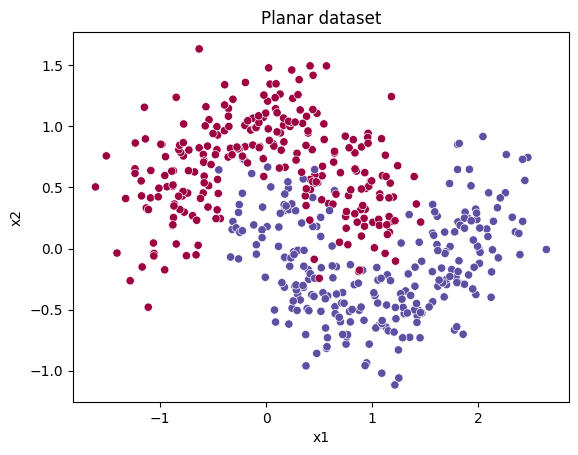

In [446]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_biclusters, make_circles, make_checkerboard, make_s_curve, make_blobs
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X, y = make_moons(n_samples= 500, noise=0.25, random_state= 42)

sns.scatterplot(x=X[:, 0], y=X[:, 1], c=y, cmap= plt.cm.Spectral)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Planar dataset")
plt.show()

In [447]:
y = y.reshape(-1, 1)


In [448]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [449]:
def initialize_parameters(input_dims, hidden_dims, output_dims):
    np.random.seed(42)
    W1 = np.random.randn(input_dims, hidden_dims) * 0.01
    b1 = np.zeros([1, hidden_dims])
    W2 = np.random.randn(hidden_dims, output_dims) * 0.01
    b2 = np.zeros([1, output_dims])
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def relu_der(z):
    return (z > 0).astype(float)

def tanh(z):
    return np.tanh(z)

def tanh_der(z):
    return 1 - np.power(np.tanh(z), 2)

def activation_forward(z, activation = "relu"):
    if activation == "relu":
        return relu(z)
    elif activation == "tanh":
        return tanh(z)
    else:
        return ValueError("Un")
    
def activation_backward(da, z, activation = "relu"):
    if activation == "relu":
        return da * relu_der(z)
    elif activation == "tanh":
        return da * tanh_der(z)
    else:
        return ValueError("un")

def cost_function(y_hat, y):
    m = y.shape[0]
    y_hat = np.clip(y_hat, 1e-10, 1 - 1e-10)
    cost = -(1/m) * np.sum(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))
    return cost

def forward(X, parameters, activation = "relu"):
    W1, b1 = parameters["W1"], parameters["b1"]
    W2, b2 = parameters["W2"], parameters["b2"]

    Z1 = X @ W1 + b1
    # A1 = np.tanh(Z1)
    A1 = activation_forward(Z1, activation)
    Z2 = A1 @ W2 + b2
    y_hat = sigmoid(Z2)
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "y_hat": y_hat}
    return y_hat, cache

def backward(X, y, parameters, cache, activation = "relu"):
    m = X.shape[0]
    y_hat = cache["y_hat"]
    Z1, A1, W2 = cache["Z1"], cache["A1"], parameters["W2"]

    dz2 = y_hat - y
    dw2 = A1.T @ dz2 / m
    db2 = np.sum(dz2, axis= 0, keepdims= True) / m
    # dz1 = (dz2 @ W2.T) * relu_der(Z1)
    dz1 = activation_backward(dz2, Z1, activation)
    # dz1 = (dz2 @ W2.T) * (1 - np.power(y_hat, 2))
    dw1 = X.T @ dz1 / m
    db1 = np.sum(dz1, axis= 0, keepdims= True) / m
    grads = {"dz2": dz2, "dw2": dw2, "db2": db2, "dz1": dz1, "dw1": dw1, "db1": db1}
    return grads

def update_parameters(parameters, grads, cache, alpha):
    parameters["W1"] -= alpha * grads["dw1"]
    parameters["b1"] -= alpha * grads["db1"]
    parameters["W2"] -= alpha * grads["dw2"]
    parameters["b2"] -= alpha * grads["db2"]
    return parameters

def predict(X, parameters):
    y_pred, p = forward(X, parameters)
    return (y_pred > 0.5).astype(int)

def train(X, y, hidden_dims = 16, alpha = 0.8, epochs = 2000, activation = "relu"):
    m, input_dims = X.shape
    output_dims = 1
    parameters = initialize_parameters(input_dims, hidden_dims, output_dims)
    cost_hist = []

    for i in range(epochs):
        # forward
        y_hat, cache = forward(X, parameters, activation)

        # loss
        cost = cost_function(y_hat, y)
        cost_hist.append(cost)

        # backward
        grads = backward(X, y, parameters, cache, activation)

        # update parameters
        parameters = update_parameters(parameters, grads, cache, alpha)

        if i % 100 == 0:
            #  | Train Acc: {acc:.2f}
            preds = predict(X, parameters)
            # acc = np.mean(preds == y) * 100
            # print(f"Training accuracy: {acc:.2f}%")
            acc = accuracy_score(y_true= y, y_pred= preds)
            print(f"Epoch {i} | Loss: {cost:.4f} | Training accuracy: {acc:.2f}%")

    return parameters, cost_hist
    
def plot_graph(X, y, parameters):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = predict(grid, parameters)
    preds = preds.reshape(xx.shape)

    plt.contourf(xx, yy, preds, cmap=plt.cm.Spectral, alpha=0.6)
    # sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.flatten(), palette="coolwarm", edgecolor="k")
    sns.scatterplot(x=X[:, 0], y=X[:, 1], c=y, cmap= plt.cm.Spectral)
    plt.title("Shallow NN Decision Boundary")
    plt.show()




In [450]:
parameters, cost_hist = train(X_train, y_train, hidden_dims = 2048, alpha = 0.8, epochs = 5000, activation = "relu")

Epoch 0 | Loss: 0.6939 | Training accuracy: 0.68%
Epoch 100 | Loss: 0.3165 | Training accuracy: 0.87%
Epoch 200 | Loss: 0.2547 | Training accuracy: 0.89%
Epoch 300 | Loss: 0.2461 | Training accuracy: 0.89%
Epoch 400 | Loss: 0.2424 | Training accuracy: 0.89%
Epoch 500 | Loss: 0.2406 | Training accuracy: 0.89%
Epoch 600 | Loss: 0.2399 | Training accuracy: 0.89%
Epoch 700 | Loss: 0.2392 | Training accuracy: 0.89%
Epoch 800 | Loss: 0.2387 | Training accuracy: 0.89%
Epoch 900 | Loss: 0.2382 | Training accuracy: 0.89%
Epoch 1000 | Loss: 0.2379 | Training accuracy: 0.89%
Epoch 1100 | Loss: 0.2375 | Training accuracy: 0.89%
Epoch 1200 | Loss: 0.2373 | Training accuracy: 0.89%
Epoch 1300 | Loss: 0.2370 | Training accuracy: 0.89%
Epoch 1400 | Loss: 0.2367 | Training accuracy: 0.89%
Epoch 1500 | Loss: 0.2364 | Training accuracy: 0.89%
Epoch 1600 | Loss: 0.2363 | Training accuracy: 0.89%
Epoch 1700 | Loss: 0.2361 | Training accuracy: 0.89%
Epoch 1800 | Loss: 0.2359 | Training accuracy: 0.89%
Epoch

In [451]:
preds = predict(X_train, parameters)
acc = np.mean(preds == y_train) * 100
print(f"Training accuracy: {acc:.2f}%")



Training accuracy: 88.75%


In [452]:
preds = predict(X_test, parameters)
acc = np.mean(preds == y_test) * 100
print(f"Testing accuracy: {acc:.2f}%")

Testing accuracy: 87.00%


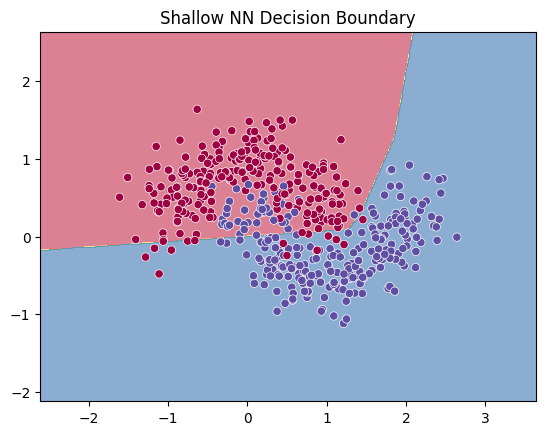

In [462]:
# plot
plot = plot_graph(X, y, parameters)

<Axes: >

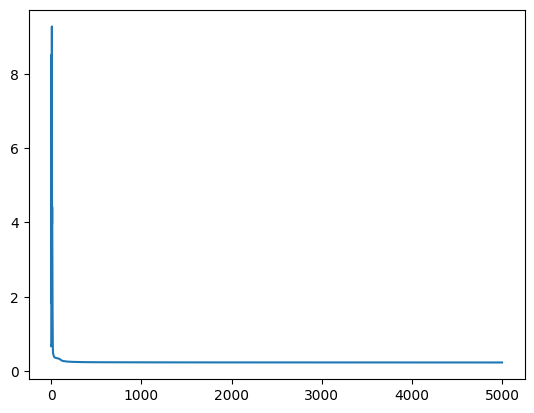

In [454]:
sns.lineplot(x= range(len(cost_hist)), y= cost_hist)

In [455]:
y_pred = predict(X_test, parameters)
confusion_matrix(y_test, y_pred)


array([[43,  0],
       [13, 44]])

In [461]:
parameters, cost_hist = train(X_train, y_train, hidden_dims = 1024, alpha = 0.1, epochs = 9000, activation = "relu")

Epoch 0 | Loss: 0.6928 | Training accuracy: 0.74%
Epoch 100 | Loss: 0.3691 | Training accuracy: 0.85%
Epoch 200 | Loss: 0.3321 | Training accuracy: 0.85%
Epoch 300 | Loss: 0.3116 | Training accuracy: 0.85%
Epoch 400 | Loss: 0.2970 | Training accuracy: 0.87%
Epoch 500 | Loss: 0.2861 | Training accuracy: 0.87%
Epoch 600 | Loss: 0.2782 | Training accuracy: 0.88%
Epoch 700 | Loss: 0.2720 | Training accuracy: 0.88%
Epoch 800 | Loss: 0.2677 | Training accuracy: 0.89%
Epoch 900 | Loss: 0.2649 | Training accuracy: 0.89%
Epoch 1000 | Loss: 0.2626 | Training accuracy: 0.89%
Epoch 1100 | Loss: 0.2610 | Training accuracy: 0.89%
Epoch 1200 | Loss: 0.2597 | Training accuracy: 0.89%
Epoch 1300 | Loss: 0.2585 | Training accuracy: 0.89%
Epoch 1400 | Loss: 0.2576 | Training accuracy: 0.89%
Epoch 1500 | Loss: 0.2569 | Training accuracy: 0.89%
Epoch 1600 | Loss: 0.2563 | Training accuracy: 0.89%
Epoch 1700 | Loss: 0.2557 | Training accuracy: 0.89%
Epoch 1800 | Loss: 0.2551 | Training accuracy: 0.89%
Epoch

In [457]:
preds = predict(X_train, parameters)
acc = np.mean(preds == y_train) * 100
print(f"Training accuracy: {acc:.2f}%")

preds = predict(X_test, parameters)
acc = np.mean(preds == y_test) * 100
print(f"Testing accuracy: {acc:.2f}%")

Training accuracy: 88.75%
Testing accuracy: 87.00%


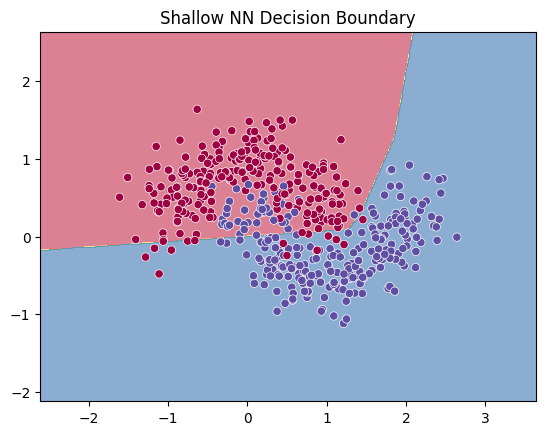

In [458]:
# plot
plot = plot_graph(X, y, parameters)

<Axes: >

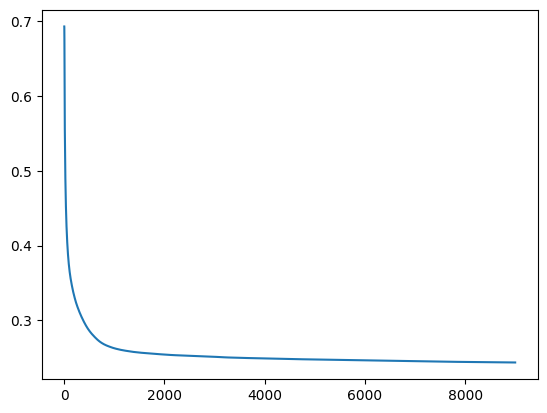

In [459]:
sns.lineplot(x= range(len(cost_hist)), y= cost_hist)